# Backpropagation y descenso de gradiente

El objetivo de este Colab es implementar el método de descenso de gradiente para el entrenamiento de una red neuronal.

Usaremos las redes neuronales feedforward que implementamos en el Colab anterior.

Antes de empezar con el código vamos a tomarnos un tiempo para hacer un repaso del funcionamiento y las ideas principales que conlleva un proceso de entrenamiento de una red neuronal.

## Repaso del método

Se tiene una red neuronal feedforward como en el siguiente gráfico

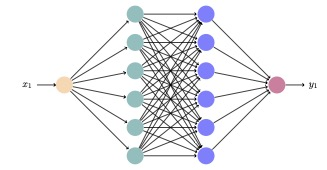

Como vimos, dado un sistema de pesos y sesgos, $w, b$, esta red define una función de salida (o forward method)
$$
y = g_{w, b}(x)
$$

Nuestro objetivo que esta red sea una buena representación de una función objetivo dada
$$
z=f(x),
$$
con lo que tenemos que encontrar el sistema de pesos tal que $g_{w, b}$ aproxime a $f$.

## Función de costo

Para medir la proximidad de $g_{w, b}$ a $f$ se define un costo (o función de pérdida -- "loss function")
$$
C(g_{w, b},f) = C(y, z).
$$
Como ejemplo de esta función tomamos el costo cuadrático medio
$$
C(y, z) = \frac12 |y-z|^2,
$$
aunque otros costos son posibles y vimos varios de esos en la materia.

## Conjunto de entrenamiento

Típicamente, no conocemos la función objetivo $f(x)$ sino que conocemos una serie de valores de $f$: $\{(x_i, z_i)\}_{i\in I}$, donde $I$ es un conjunto finito. Notamos a este conjunto de entrenamiento como $T$ (de *Train set*).
Luego, la función de costo que se toma es
$$
\frac{1}{\# I}\sum_{i\in I} C(y_i, z_i),
$$
donde $y_i = g_{w, b}(x_i)$ (es decir, la salida de la red con entrada $x_i$).

Para el error cuadrático medio, se tiene
$$
\frac{1}{\# I} \sum_{i\in I} \frac12 |y_i-z_i|^2.
$$
Observemos que este error resulta ser función del sistema de pesos y sesgos $(w, b)$, es decir
$$
C(w, b) = \frac{1}{\# I}\sum_{i\in I} C(y_i, z_i) = \frac{1}{\# I}\sum_{i\in I} C(g_{w, b}(x_i), z_i).
$$

Luego el objetivo es el de encontrar el sistema de pesos y sesgos que minimicen este error
$$
(w^*, b^*) = \text{argmin}_{(w, b)} C(w, b).
$$

## Descenso de gradiente

Para encontrar ese sistema de pesos y sesgos óptimos se utiliza *el método de descenso de gradiente*

Esto consiste en usar el concepto de que el vector $-\nabla_{w, b} C(w, b)$ es el vector que apunta en la dirección de máximo decrecimiento de la función $C(w, b)$

Se define un hiperparámetro $\eta>0$ llamado *tasa de aprendizaje* (learning rate) y se toma un valor inicial de pesos y sesgos de forma aleatoria $(w_0, b_0)$. Luego, se define la siguiente secuencia recursiva
$$
w_{k+1} = w_k - \eta \nabla_w C(w_k, b_k)\quad \text{y}\quad b_{k+1} = b_k - \eta \nabla_b C(w_k, b_k).
$$

Heurísticamente se espera que el costo vaya descendiendo a medida que avanzamos con esta secuencia de pesos y sesgos y se continúa hasta que el costo sea admisible.

Cada paso de iteración se lo denomina una *época* de entrenamiento. El número de épocas de entrenamiento es un hiperparámetro del algoritmo.

## Repaso de notación de la red

El número de capas de una red la notamos por $L$, y las enumeramos usando el super-índice $0\le \ell\le L$. La capa $\ell=0$ es la capa de entrada, la capa $\ell=L$ es la salida de la red y las capas $1\le\ell\le L-1$ son las capas ocultas.

La cantidad de neuronas de la capa $\ell$ se nota por $d^{(\ell)}$. El sesgo asociado a la $j-$ésima neurona de la capa $\ell$ se nota por $b_j^{(\ell)}$ y el peso que conecta la $i-$ésima neurona de la capa $\ell-1$ con la $j-$ésima neurona de la capa $\ell$ se nota por $w_{ij}^{(\ell)}$.

La salida de la capa $\ell-1$, que es la entrada de la capa $\ell$, se nota por $\mathbf x^{(\ell-1)} = (x_1^{(\ell-1)},\dots,x_{d^{(\ell-1)}}^{(\ell-1)})^T$, $\ell=1,\dots, L$. Recordemos que $\mathbf x^{(0)}$ son las entradas de la red.

La $j-$ésima neurona de la capa $\ell$, toma las entradas de esa capa y primero calcula la *señal*
$$
s_j^{(\ell)} = \sum_{i=1}^{d^{(\ell-1)}} w_{ij}^{(\ell)} x_i^{(\ell-1)} - b_j^{(\ell)}.
$$

Matricialmente, el vector de señales $\mathbf s^{(\ell)} = (s_1^{(\ell)},\dots,s_{d^{(\ell)}}^{(\ell)})^T$, se calcula como
$$
\mathbf s^{(\ell)} = W^{(\ell)^T} \mathbf x^{(\ell-1)} - \mathbf b^{(\ell)},
$$
donde $W^{(\ell)} = (w_{ij}^{(\ell)})$ ($1\le i\le d^{(\ell-1)}$, $1\le j\le d^{(\ell)}$) es la matriz de pesos que conecta la capa $\ell-1$ con la capa $\ell$ y $W^{(\ell)^T}$ es su transpuesta.

Luego, la neurona toma la señal $s_j^{(\ell)}$ y le aplica la función de activación $\phi$ para producir la salida
$$
x_j^{(\ell)} = \phi(s_j^{(\ell)}) = \phi\left(\sum_{i=1}^{d^{(\ell-1)}} w_{ij}^{(\ell)} x_i^{(\ell-1)} - b_j^{(\ell)}\right).
$$

El vector de salida de la capa $\ell$ es entonces $\mathbf x^{(\ell)} = (x_1^{(\ell)},\dots, x_{d^{(\ell)}}^{(\ell)})^T$ y la salida de la red es
$$
\mathbf y = \mathbf x^{(L)}.
$$

Para nuestra red, asumiremos que todas las capas tienen la misma función de activación, $\phi$, menos la última que asumiremos que tiene función de activación lineal, con lo que
$$
y_j = x_j^{(L)} = \sum_{i=1}^{d^{(L-1)}} \lambda_{ij} x_i^{(L-1)},
$$
donde $\lambda_{ij} = w_{ij}^{(L)}$ y $b_j^{(L)} = 0$.


## Backpropagation -- Cálculo de $\nabla_{w, b} C$

Este es el algoritmo más importante de todo el ciclo de entrenamiento: el cálculo de $\nabla_{w, b} C$. El objetivo es dar un mecanismo para el cálculo que sea simple de implementar computacionalmente.

Empecemos calculando $\partial_{\lambda_{ij}} C$.

Recordemos que $C = C(y)$ y que $y = \mathbf x^{(L)} = \mathbf s^{(L)} = (s_1^{(L)},\dots,s_{d^{(L)}}^{(L)})$, con $s_j^{(L)} = \lambda_{1j}x_1^{(L-1)} + \cdots + \lambda_{d^{(L-1)}j} x_{d^{(L-1)}}^{(L-1)}$.

De estas expresiones observamos que el peso $\lambda_{ij}$ sólo aparece en la señal $s_j^{(L)}$, luego
$$
\partial_{\lambda_{ij}} C = \frac{\partial C}{\partial s_j^{(L)}} \frac{s_j^{(L)}}{\partial \lambda_{ij}} = \delta_j^{(L)} x_i^{(L-1)},
$$
donde
$$
\delta_j^{(L)} = \frac{\partial C}{\partial s_j^{(L)}} = \frac{\partial C}{\partial y_j}\qquad \left(\frac{\partial C}{\partial y_j} = (y_j-z_j)\ \text{para el costo cuadrático medio}\right)
$$

Calculemos ahora las derivadas respecto a los demás pesos, $\partial_{w_{ij}^{(\ell)}} C$.

Al igual que antes, observemos que el peso $w_{ij}^{(\ell)}$ sólo aparece en la señal $s_j^{(\ell)}$, luego
$$
\frac{\partial C}{\partial w_{ij}^{(\ell)}} = \frac{\partial C}{\partial s_j^{(\ell)}} \frac{\partial s_j^{(\ell)}}{\partial w_{ij}^{(\ell)}} = \delta_j^{(\ell)} x_i^{(\ell-1)},
$$
donde
$$
\delta_j^{(\ell)} = \frac{\partial C}{\partial s_j^{(\ell)}}.
$$
Análogamente
$$
\frac{\partial C}{\partial b_j^{(\ell)}} = - \delta_j^{(\ell)}.
$$
Queda entonces calcular los $\delta_j^{(\ell)}$ para $\ell=1,\dots,L-1$.

Para esto usamos la regla de la cadena:
$$
\delta_i^{\ell-1} = \frac{\partial C}{\partial s_i^{(\ell-1)}} = \sum_{j=1}^{d^{(\ell)}} \frac{\partial C}{\partial s_j^{(\ell)}} \frac{{\partial s_j^{(\ell)}}}{\partial s_i^{(\ell-1)}} = \sum_{j=1}^{d^{(\ell)}} \delta_j^{(\ell)} \frac{{\partial s_j^{(\ell)}}}{\partial s_i^{(\ell-1)}}
$$

Finalmente, de la expresión
$$
s_j^{(\ell)} = \sum_{i=1}^{d^{(\ell-1)}} w_{ij}^{(\ell)} x_i^{(\ell-1)} - b_j^{(\ell)} = \sum_{i=1}^{d^{(\ell-1)}} w_{ij}^{(\ell)} \phi(s_i^{(\ell-1)}) - b_j^{(\ell)},
$$
obtenemos
$$
\frac{{\partial s_j^{(\ell)}}}{\partial s_i^{(\ell-1)}} = w_{ij}^{(\ell)} \phi'(s_i^{(\ell-1)})
$$

## Ecuaciones Maestras

Llegamos a las ecuaciones maestras que arman el *algoritmo de retropropagación*
\begin{align}\tag{1}
x_j^{(\ell)} &= \phi\left(\sum_{i=1}^{d^{(\ell-1)}} w_{ij}^{(\ell)} x_i^{(\ell-1)} - b_j^{(\ell)}\right),\quad \ell=1,\dots,L-1\\ \tag{2}
s_j^{(\ell)} &= \sum_{i=1}^{d^{(\ell-1)}} w_{ij}^{(\ell)} x_i^{(\ell-1)} - b_j^{(\ell)}\\ \tag{3}
y_j &= x_j^{(L)} = \sum_{i=1}^{d^{(L-1)}} \lambda_{ij} x_i^{(L-1)}\\ \tag{4}
\delta_j^{(L)} &= \frac{\partial C}{\partial y_j}\\ \tag{5}
\delta_i^{(\ell-1)} &= \phi'(s_i^{(\ell-1)})\sum_{j=1}^{d^{(\ell)}} w_{ij}^{(\ell)} \delta_j^{(\ell)},\quad \text{(fórmula de retropropagación de deltas)}\\ \tag{6}
\partial_{\lambda_{ij}} C &= x_i^{(L-1)}\delta_j^{(L)}\\ \tag{7}
\partial_{w_{ij}^{(\ell)}} C &= x_i^{(\ell-1)} \delta_j^{(\ell)}\\ \tag{8}
\partial_{b_j^{(\ell)}} C &= -\delta_j^{(\ell)}.
\end{align}

Las ecuaciones (1), (2) y (3) son el forward method. Es decir el cálculo de la salida de la red.

Las ecuaciones (4) y (5) son el algoritmo de retropropagación para el cálculo de deltas.

Finalmente, las ecuaciones (6), (7) y (8) son el cálculo del gradiente de la función de costo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def neural_network_regression(X_train, y_train, d, nabla, phi, d_phi):
    '''
    inputs:

    d : list of L+1 integers where d[i] is the number of neurons in layer i
        d[0] : number of featuress
        d[L] : number of output neurons
    X_train: training data with shape (n_samples, d[0])
    y_train: training labels with shape (n_samples, d[L])

    nabla : learning rate > 0
    phi : activation function to apply to the output layer
        e.g. sigmoid, relu, softmax, etc.

    d_phi : derivative of the activation function

    outputs:
    W : list of L matrices where W[l, i, j] is the weight from input i to the neuron j in the layer l
    B : list of L vectors where B[l, j] is the bias from the neuron j in the layer l
    '''
    N = len(X_train)
    W, B = initialize_parameters(d)

    d_cost_W, d_cost_B = initialize_gradients_per_sample(N) # N x dim(W), N x dim(B)

    # loop epocas:
    for _ in range(10):
        for i in range(N):
            # batch training
            x_0 = X_train[i]
            y_0 = y_train[i]

            X = forward_propagation(x_0, W, B, phi)
            delta = backpropagation(X, y_0, W, B, d_phi)

            d_cost_W[i] = gradient_W(X, delta)
            d_cost_B[i] = gradient_B(delta)

        # average gradients
        d_cost_W_mean = np.mean(d_cost_W, axis=0)
        d_cost_B_mean = np.mean(d_cost_B, axis=0)

        # gradient descent algorithm
        W, B = gradient_descent(W, B, d_cost_W_mean, d_cost_B_mean, nabla)
    
    return W, B

In [10]:
np.random.seed(0)

s = np.random.randint(low=0, high=10, size=(3, 2, 4))
s

array([[[5, 0, 3, 3],
        [7, 9, 3, 5]],

       [[2, 4, 7, 6],
        [8, 8, 1, 6]],

       [[7, 7, 8, 1],
        [5, 9, 8, 9]]], dtype=int32)

## Forma matricial de las ecuaciones maestras

Para la implementación es mejor escribir las ecuaciones (1)--(8) en forma matricial que es como trabaja el código.
Los datos entonces se toman
$$
\mathbf x^{(\ell)} = (x_1^{(\ell)},\dots,x_{d^{(\ell)}}^{(\ell)})^T,\ W^{(\ell)} = (w_{ij}^{(\ell)})_{i,j},\ \mathbf b^{(\ell)} = (b_1^{(\ell)},\dots,b_{d^{(\ell)}}^{(\ell)})^T
$$
$$
\delta^{(\ell)} = (\delta_1^{(\ell)},\dots,\delta_{d^{(\ell)}}^{(\ell)})^T,\ \mathbf s^{(\ell)} = (s_1^{(\ell)},\dots,s_{d^{(\ell)}}^{(\ell)})^T
$$
con la convención de que aplicar la función de activación $\phi$ sobre un vector es hacerlo componente a componente. Entonces las ecuaciones quedan
\begin{align}
\mathbf x^{(\ell)} &= \phi\left(W^{(\ell)^T} \mathbf x^{(\ell-1)} - \mathbf b^{(\ell)}\right)\\
\delta^{(L)} &= \nabla_{\mathbf y}C(\mathbf x^{(L)}, \mathbf z) \odot \phi'(\mathbf s^{(L)})\\
\delta^{(\ell-1)} &= (W^{(\ell)}\delta^{(\ell)})\odot \phi'(\mathbf s^{(\ell-1)})\\
\frac{\partial C}{\partial W^{(\ell)}} &= \mathbf x^{(\ell-1)} \delta^{(\ell)^T}\\
\frac{\partial C}{\partial \mathbf b^{(\ell)}} &= -\delta^{(\ell)},
\end{align}
donde $\odot$ es el producto de Hadamard entre vectores que consiste en multiplicar componente a componente.

## Descenso de gradiente

Finalmente, la iteración para el descenso de gradiente se construye como
\begin{align}
\lambda_{ij}(k+1) &= \lambda_{ij}(k) - \eta x_i^{(L-1)}\delta_j^{(L)}\\
w_{ij}^{(\ell)}(k+1) &= w_{ij}^{(\ell)}(k) - \eta x_i^{(\ell-1)}\delta_j^{(\ell)}\\
b_j^{(\ell)}(k+1) &= b_j^{(\ell)}(k) + \eta \delta_j^{(\ell)}.
\end{align}
Observemos que en las ecuaciones de arriba las salidas $x_i^{(\ell-1)}$ dependen de la iteración lo mismo que los deltas $\delta_j^{(\ell)}$.